In [71]:
using ITensors, ITensorMPS, Optim, LinearAlgebra, Printf, Random, Plots, DelimitedFiles, JLD2
include("src/basic_CPHL_utils.jl")
include("src/CPHL_module.jl")

N_g = 20;
g_vals = collect(range(-1, 1; length = N_g + 2)[2:end-1]);
N_sites = 5
cphl = CPHL.CPHLSolver(N_sites, g_vals);

In [72]:
CPHL.SetUpHamiltonians(cphl);
OString_bare_vals = copy(cphl.OString_GS_vals)
ZZ_bare_vals = copy(cphl.ZZ_GS_vals)

λ = 0.5
cphl.OrgWeight = copy(λ)
cphl.OStringWeight = copy(λ)
CPHL.OptimizeCPDMRG(cphl);

In [73]:
for i in 1:20
    CPHL.LearnHarmonics(cphl)

    @save "DATA/ALPHAMat_$(N_sites).jld2" ALPHAMat = copy(cphl.ALPHAMat)
    if cphl.flag_convegence
        println("Converged")
        break
    end
end

Current error = 0.2554732522749399; λ weight = 0.5
Current error = 0.19504730436103535; λ weight = 0.4166666666666667
Current error = 0.14772811266491873; λ weight = 0.35714285714285715
Current error = 0.11068490253832912; λ weight = 0.3125
Current error = 0.08168438091153019; λ weight = 0.2777777777777778
Current error = 0.058982321541942946; λ weight = 0.25
Current error = 0.04122817483753064; λ weight = 0.22727272727272727
Current error = 0.027398222885404312; λ weight = 0.20833333333333331
Current error = 0.016786208386119654; λ weight = 0.1923076923076923
Current error = 0.00921508315382808; λ weight = 0.17857142857142858
Converged in 10 iterations
Updated coefficients
Converged


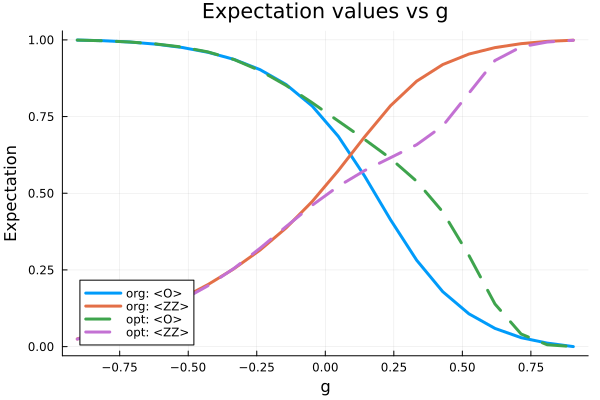

In [74]:
p = plot(cphl.g_vals, OString_bare_vals, label="org: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3);
plot!(p, cphl.g_vals, ZZ_bare_vals / (cphl.N_sites - 1), label="org: <ZZ>", linewidth=3);

plot!(p, cphl.g_vals, cphl.OString_GS_vals, label="opt: <O>", title="Expectation values vs g", xlabel="g", ylabel="Expectation", linewidth=3, linestyle = :dash);
plot!(p, cphl.g_vals, cphl.ZZ_GS_vals / (cphl.N_sites - 1), label="opt: <ZZ>", linewidth=3, linestyle = :dash);
display(p)